<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/4%20K-Means_Clustering/K_Means_Algorithm_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Algorithm and Implementation from Scratch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics

## Algorithm

Suppose:

> there are dataset $x^{(1)}, x^{(2)},...,x^{(n)}\in\mathbb{R}^m$
>
> there are $n$ data points in the dataset, and $m$ features.
>
> there are $k$ clusters

There are five steps for K-Means:

1.Randomly initializing the cluster centroids $\mu_1,\mu_2,...,\mu_k\in\mathbb{R}^m$.

2.Calculate the distances between each data points and the $k$ centroids:

> For $i$ from 1 to $n$, and for $j$ from 1 to $k$:
>
> $\quad d_j = \parallel x^{(i)}-\mu_j \parallel $
>

3.Assign each data point to the nearest centroid based on the distances:

> For $i$ from 1 to $n$:
>
> $\quad c^{(i)} = \displaystyle\operatorname*{arg} \min_{j}(d_j)$
>
> where $c^{(i)}$ is the cluster, or lable, of $i$-th data point.

4.Update centroids by taking the average of the data points in each cluster:

>for $j$ from 1 to $k$:
>
>$\quad\mu_j=\frac{\displaystyle\sum_{i=1}^n1{\{c^{(i)}=j\}}x^{(i)}}{\displaystyle\sum_{i=1}^n1{\{c^{(i)}=j\}}}$

5.Repeats the step 2 to 4 until convergence. 

> Convergence means the centroids don’t change any more, or a given max iteration number is reached.


**Euclidean Distance function**

Euclidean Distance function is used to calculate the distances in Step 2.

In $2$-dimensional space, there are two vectors: $v = (x_1, y_1)$ and $u = (x_2, y_2)$, 

The Euclidean distance between $v$ and $u$ is:

$\quad d(u,v) = \parallel u-v \parallel = \sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$

<br>

In $n$-dimensional space there are vectors: $v = (v_1, v_2, ... , v_n)$ and $u =(u_1, u_2, ..., u_n)$, 

The Euclidean distance between $v$ and $u$ is:

$\quad d(u,v) = \parallel u-v \parallel = \sqrt{(u_1-v_1)^2+(u_2-v_2)^2+...+(u_n-v_n)^2}$

```
def _euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2, axis=1))
```



## Implementation from Scratch

In [ ]:
class KMeans:

    def __init__(self, X, clusters, random_state=0):
        self.X = X
        self.K = clusters
        self.samples, self.features = X.shape
        # Step 1, initialize centroids
        self.centroid = self.initialize(random_state)

    def _euclidean(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))
        # return np.linalg.norm(a-b, axis=1)
    
    def initialize(self, random_state):
        np.random.seed(random_state)
        idx = np.random.choice(self.samples, size=self.K, replace=False)
        return self.X[idx, :]

    def distance(self, X, centroid):
        return np.array([self._euclidean(X, centroid) for centroid in self.centroid])

    def assign(self, distances):
        return np.argmin(distances, axis=0)

    def update(self, label):
        centroid_ = []
        for j in range(self.K):
            temp_ = self.X[label==j].mean(axis=0) 
            centroid_.append(temp_)
        return np.vstack(centroid_)

    def fit(self, epoch):
        for _ in range(epoch): 
            # Step 2, find distances between centroids and all the data points
            distances_ = self.distance(self.X, self.centroid)
            # Step 3, assign each data point to the closest centroid according to the distance found.
            self.label = self.assign(distances_)
            # Step 4, update centroids with the minimum distance
            self.centroid = self.update(self.label)

    def predict(self, X):
        distances_ = self.distance(X, self.centroid)
        return self.assign(distances_)


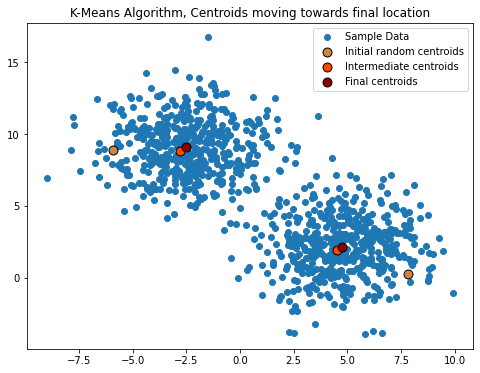

In [ ]:
k = 2
X, y = make_blobs(n_samples=1000, centers=k, cluster_std=2.0,  random_state=42)
km = KMeans(X, k, random_state=0)
centroid_init = km.centroid
km.fit(epoch=1)
centroid_1 = km.centroid
km.fit(epoch=100)
centroid_final = km.centroid
pred = km.predict(X)

fig = plt.figure(figsize=(8,6))
plt.title(r'K-Means Algorithm, Centroids moving towards final location')
plt.scatter(X[:,0], X[:,1], label="Sample Data")
plt.scatter(centroid_init[:,0], centroid_init[:,1], c='peru', ec='k', s=80, label="Initial random centroids")
plt.scatter(centroid_1[:,0]-0.3, centroid_1[:,1]-0.2, c='orangered', ec='k', s=80, label="Intermediate centroids")
plt.scatter(centroid_final[:,0], centroid_final[:,1], c='darkred', ec='k', s=80, label="Final centroids")
plt.legend(loc='best')
plt.savefig("kmeans_from_scratch1.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()

Final results:

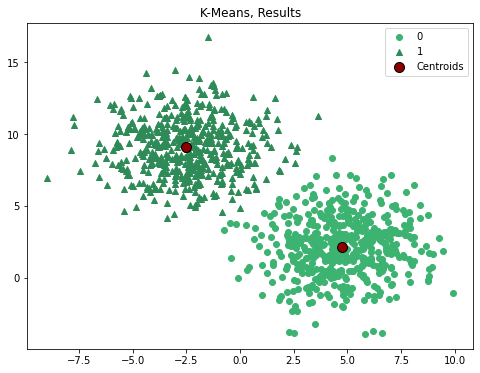

In [ ]:
colors = {0: 'mediumseagreen', 1: 'seagreen'}
markers = {0: 'o', 1: '^'}
fig = plt.figure(figsize=(8,6))
plt.title(r'K-Means, Results')
for cluster in np.unique(pred):
    ix = np.where(pred == cluster)
    plt.scatter(X[ix,0], X[ix,1], label = cluster, marker = markers[cluster], c = colors[cluster])
plt.scatter(km.centroid[:,0], km.centroid[:,1], c='darkred', ec='k', s=100, label = 'Centroids')
plt.legend(loc='best')
plt.savefig("kmeans_from_scratch2.svg", format="svg", transparent=True, bbox_inches='tight')
plt.show()